In [ ]:














import pandas as pd

# Load the dataset
file_path = "cleaned_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,label,total_methods,version_code,file_size_kb,num_files,num_receivers,num_intents,num_services,num_permissions,num_activities,...,package_name_xyz.studiox.pixels,package_name_yahoo.mail.app,package_name_ymezk.votfyo.maltest2,package_name_you.in.spark.energy,package_name_za.co.prosense.impression,package_name_zihao.QQ1365036395,package_name_zoeaai.sbevo.tadkw,package_name_zok.android.numbers,package_name_zv.cbo.d,package_name_zvy.zpfypq.bbuhtkwvaf
0,benign,0.199328,-0.136558,-0.717146,-0.307581,-0.542286,-0.003190,-0.615492,-0.634561,-0.506722,...,False,False,False,False,False,False,False,False,False,False
1,benign,0.721002,-0.136558,2.177061,0.352652,0.020795,-0.064449,1.078521,0.126888,-0.414756,...,False,False,False,False,False,False,False,False,False,False
2,benign,-0.069323,-0.136558,-0.519186,-0.082065,-0.542286,0.149959,-0.461491,-0.211534,0.014417,...,False,False,False,False,False,False,False,False,False,False
3,benign,-1.236150,-0.136558,-0.779021,-0.693357,-0.542286,-0.156339,-0.461491,-0.465350,-0.537377,...,False,False,False,False,False,False,False,False,False,False
4,benign,0.329131,-0.136399,-0.507419,0.110822,0.959264,0.088700,0.616517,0.042283,-0.292136,...,False,False,False,False,False,False,False,False,False,False


In [2]:
from sklearn.preprocessing import LabelEncoder

# Encode the label column to numerical values
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])

# Check encoded labels
df["label"].value_counts()


label
1    1700
4     109
3     109
2     101
0      84
Name: count, dtype: int64

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Exclude the label column from scaling
features = df.drop(columns=["label"])
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame and reattach labels
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled["label"] = df["label"]

# Check the scaled dataset
df_scaled.head()


,total_methods,version_code,file_size_kb,num_files,num_receivers,num_intents,num_services,num_permissions,num_activities,has_native_code,...,package_name_yahoo.mail.app,package_name_ymezk.votfyo.maltest2,package_name_you.in.spark.energy,package_name_za.co.prosense.impression,package_name_zihao.QQ1365036395,package_name_zoeaai.sbevo.tadkw,package_name_zok.android.numbers,package_name_zv.cbo.d,package_name_zvy.zpfypq.bbuhtkwvaf,label
0,-0.663252,-1.000000,-0.904317,-0.943296,-0.961538,-0.987109,-1.000000,-0.934211,-0.982935,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
1,-0.546247,-1.000000,0.176322,-0.878813,-0.846154,-0.990792,-0.810345,-0.815789,-0.972696,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
2,-0.723507,-1.000000,-0.830402,-0.921271,-0.961538,-0.977901,-0.982759,-0.868421,-0.924915,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
3,-0.985212,-1.000000,-0.927420,-0.980974,-0.961538,-0.996317,-0.982759,-0.907895,-0.986348,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
4,-0.634139,-0.999965,-0.826009,-0.902432,-0.653846,-0.981584,-0.862069,-0.828947,-0.959044,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load and scale data
df_scaled = df.copy()
scaler = MinMaxScaler(feature_range=(-1, 1))
df_scaled.iloc[:, :-1] = scaler.fit_transform(df_scaled.iloc[:, :-1]).astype(np.float32)  # Explicitly cast to float32

# Ensure all feature columns are numeric
df_scaled = df_scaled.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values
df_scaled.fillna(0, inplace=True)  # Replace NaNs with zeros if necessary

def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            m.bias.data.fill_(0)

# Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512, track_running_stats=False),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024, track_running_stats=False),
            nn.ReLU(),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    
    def forward(self, z):
        return self.model(z)

# Discriminator with noise input
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x, noise_factor=0.1):
        if self.training:
            x = x + noise_factor * torch.randn_like(x)  # Avoid in-place modification
        return self.model(x)

# Hyperparameters
data_dim = df_scaled.shape[1] - 1
latent_dim = 100
batch_size = 64
epochs = 100

generator = Generator(latent_dim, data_dim)
discriminator = Discriminator(data_dim)
generator.apply(weights_init)
discriminator.apply(weights_init)

criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0001, betas=(0.5, 0.999))  # Lower LR

# Prepare DataLoader
data_tensor = torch.tensor(df_scaled.drop(columns=['label']).astype(np.float32).values)
dataloader = DataLoader(TensorDataset(data_tensor), batch_size=batch_size, shuffle=True)

def train_dcgan(generator, discriminator, dataloader, epochs):
    generator.train()
    discriminator.train()

    for epoch in range(epochs):
        for real_data in dataloader:
            real_data = real_data[0]
            batch_size = real_data.size(0)
            
            # Smoothed labels
            real_labels = torch.full((batch_size, 1), 0.9)
            fake_labels = torch.full((batch_size, 1), 0.0)

            # Train Discriminator
            d_optimizer.zero_grad()
            outputs_real = discriminator(real_data)
            d_loss_real = criterion(outputs_real, real_labels)
            
            z = torch.randn(batch_size, latent_dim)
            fake_data = generator(z)
            outputs_fake = discriminator(fake_data.detach())
            d_loss_fake = criterion(outputs_fake, fake_labels)
            
            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            d_optimizer.step()

            # Train Generator (make fake samples look real)
            g_optimizer.zero_grad()
            z = torch.randn(batch_size, latent_dim)
            fake_data = generator(z)
            outputs = discriminator(fake_data)
            g_loss = criterion(outputs, torch.ones_like(outputs))
            g_loss.backward()
            g_optimizer.step()
        
        print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

train_dcgan(generator, discriminator, dataloader, epochs)




C:\Users\erwin\AppData\Local\Temp\ipykernel_2600\3063826912.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.iloc[:, :-1] = scaler.fit_transform(df_scaled.iloc[:, :-1]).astype(np.float32)  # Explicitly cast to float32
C:\Users\erwin\AppData\Local\Temp\ipykernel_2600\3063826912.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1. -1. -1. ... -1. -1. -1.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_scaled.iloc[:, :-1] = scaler.fit_transform(df_scaled.iloc[:, :-1]).astype(np.float32)  # Explicitly cast to float32
C:\Users\erwin\AppData\Local\Temp\ipykernel_2600\3063826912.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will rais

Epoch [1/100] | D Loss: 0.8322 | G Loss: 3.4567
Epoch [2/100] | D Loss: 0.4424 | G Loss: 5.9745
Epoch [3/100] | D Loss: 0.3968 | G Loss: 6.3530
Epoch [4/100] | D Loss: 0.3787 | G Loss: 5.5312
Epoch [5/100] | D Loss: 0.3734 | G Loss: 5.3518
Epoch [6/100] | D Loss: 0.8951 | G Loss: 6.9677
Epoch [7/100] | D Loss: 1.6260 | G Loss: 3.7161
Epoch [8/100] | D Loss: 1.3116 | G Loss: 0.4774
Epoch [9/100] | D Loss: 1.6539 | G Loss: 0.9737
Epoch [10/100] | D Loss: 1.1931 | G Loss: 0.5669
Epoch [11/100] | D Loss: 1.2011 | G Loss: 0.8992
Epoch [12/100] | D Loss: 1.3022 | G Loss: 1.0261
Epoch [13/100] | D Loss: 1.2719 | G Loss: 0.9587
Epoch [14/100] | D Loss: 1.2244 | G Loss: 0.7877
Epoch [15/100] | D Loss: 1.2859 | G Loss: 0.9938
Epoch [16/100] | D Loss: 1.2700 | G Loss: 1.0365
Epoch [17/100] | D Loss: 1.2346 | G Loss: 0.9632
Epoch [18/100] | D Loss: 1.2711 | G Loss: 1.0558
Epoch [19/100] | D Loss: 1.3657 | G Loss: 0.9345
Epoch [20/100] | D Loss: 1.3051 | G Loss: 0.9019
Epoch [21/100] | D Loss: 1.32

In [19]:
# Generate new samples
num_samples = 1000  # Adjust based on your needs
z = torch.randn(num_samples, latent_dim)  # Generate random noise
generated_data = generator(z).detach().numpy()  # Generate data & convert to NumPy

# Convert back to original scale (if needed)
scaler = MinMaxScaler()
scaler.fit(df_scaled.drop(columns=['label']))  # Fit on real data before transforming
generated_data = scaler.inverse_transform(generated_data)

# Save to CSV
df_generated = pd.DataFrame(generated_data, columns=df_scaled.drop(columns=['label']).columns)  # Exclude label column
df_generated.to_csv("generated_data.csv", index=False)
print("Generated data saved to generated_data.csv")

Generated data saved to generated_data.csv


In [23]:
# Ensure generated data matches real data structure
X_real = df_scaled.drop(columns=['label'])

# Check for missing columns in generated data and add them with default values
missing_columns = set(X_real.columns) - set(df_generated.columns)
for col in missing_columns:
    df_generated[col] = 0  # or np.nan, or any default value

# Ensure the order of columns in generated data matches the real data
df_generated = df_generated[X_real.columns]

# Split real data into training and test sets
y_real = df['label'].astype(int)  # Convert labels to integers
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)


# Train classifier on real data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Test classifier on real data
y_pred_real = clf.predict(X_test)
acc_real = accuracy_score(y_test, y_pred_real)

# Predict class distribution on generated data
y_pred_generated = clf.predict(df_generated)
num_classes = len(np.unique(y_real))
real_class_distribution = np.bincount(y_test, minlength=num_classes) / len(y_test)
generated_class_distribution = np.bincount(y_pred_generated, minlength=num_classes) / len(y_pred_generated)

# Print results
print(f"Real Data Accuracy: {acc_real:.2f}")
print("Class Distribution in Real Data:", real_class_distribution)
print("Class Distribution in Generated Data:", generated_class_distribution)


Real Data Accuracy: 0.94
Class Distribution in Real Data: [0.02850356 0.82422803 0.04275534 0.04988124 0.05463183]
Class Distribution in Generated Data: [0.    0.998 0.002 0.    0.   ]


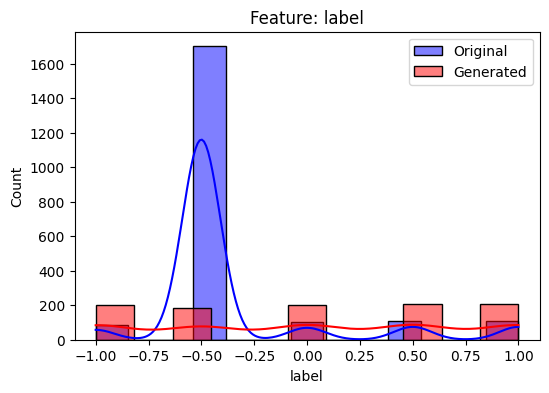

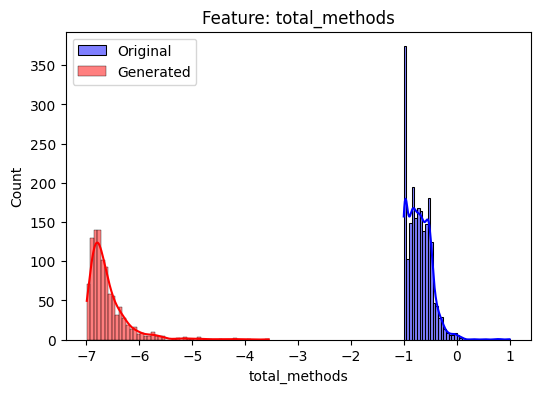

KeyboardInterrupt: 

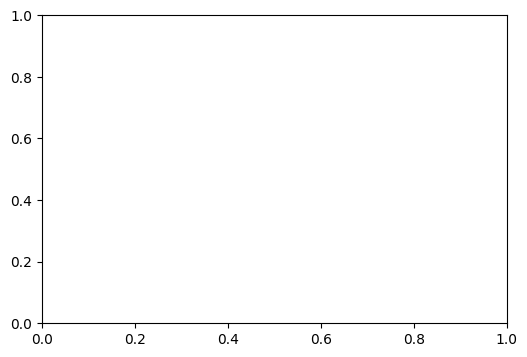

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare histograms of original vs generated data
for col in df_scaled.columns[:-1]:  # Exclude label column
    plt.figure(figsize=(6,4))
    sns.histplot(df_scaled[col], label="Original", color='blue', kde=True)
    sns.histplot(df_generated[col], label="Generated", color='red', kde=True)
    plt.title(f"Feature: {col}")
    plt.legend()
    plt.show()




# Compare histograms of original vs generated data



In [25]:


import pandas as pd
import numpy as np

# Convert generated data to DataFrame with correct column names
df_generated = pd.DataFrame(df_generated, columns=df_scaled.drop(columns=['label']).columns)

# Convert data type to float32 before transformation
df_generated = df_generated.astype(np.float32)

# Ensure generated data is scaled back to original range
df_generated[:] = scaler.inverse_transform(df_generated)

# Add fake labels (if needed)
if len(df_scaled["label"].unique()) > 1:
    df_generated["label"] = np.random.choice(df_scaled["label"].dropna().unique(), len(df_generated))

# Merge with real data
df_augmented = pd.concat([df_scaled, df_generated], axis=0, ignore_index=True)

# Save dataset
df_augmented.to_csv("augmented_dataset.csv", index=False)
print("✅ Augmented dataset saved.")

# Show a preview
print("Generated Data Sample:")
print(df_generated.head())



✅ Augmented dataset saved.
Generated Data Sample:
   total_methods  version_code  file_size_kb  num_files  num_receivers  \
0      -6.822830     -6.870196     -4.131306  -6.959883      -4.998062   
1      -6.899518     -6.900681     -3.730600  -6.957938      -4.814406   
2      -6.704464     -6.869869     -2.679452  -6.839806      -5.913327   
3      -6.527778     -6.843778     -3.210813  -6.896325      -4.815701   
4      -6.475798     -6.736156     -4.416557  -6.853216      -5.331282   

   num_intents  num_services  num_permissions  num_activities  \
0    -6.948264     -6.616487        -6.852652       -6.681337   
1    -6.954463     -6.671453        -6.878738       -6.459757   
2    -6.863040     -6.906606        -6.792255       -6.713073   
3    -6.914300     -6.909337        -6.625526       -6.665976   
4    -6.914614     -6.757505        -6.276017       -6.654174   

   has_native_code  ...  package_name_yahoo.mail.app  \
0        -5.046144  ...                    -6.870602   
1 

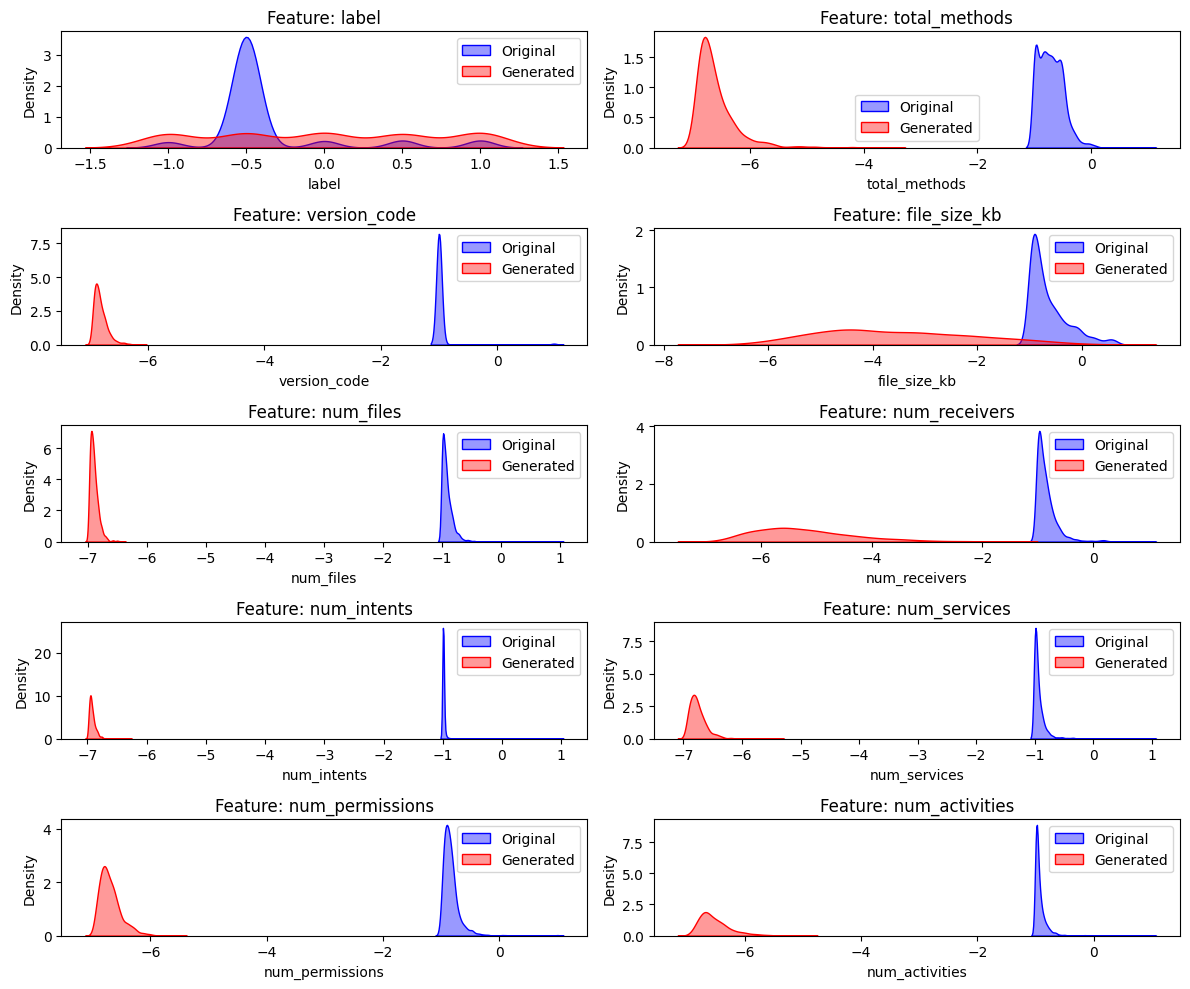

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Set number of features to plot (adjust for speed)
num_features_to_plot = min(10, len(df_scaled.columns) - 1)  
selected_features = df_scaled.columns[:num_features_to_plot]  

# Ensure generated data has the same columns as real data
df_generated = df_generated[df_scaled.columns[:-1]]

# Create subplots (handle odd feature count)
nrows = math.ceil(len(selected_features) / 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12, nrows * 2))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(selected_features):
    sns.kdeplot(df_scaled[col], label="Original", color='blue', fill=True, alpha=0.4, ax=axes[i])
    sns.kdeplot(df_generated[col], label="Generated", color='red', fill=True, alpha=0.4, ax=axes[i])
    
    axes[i].set_title(f"Feature: {col}")
    axes[i].legend()

# Hide unused subplot axes (for odd feature count)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


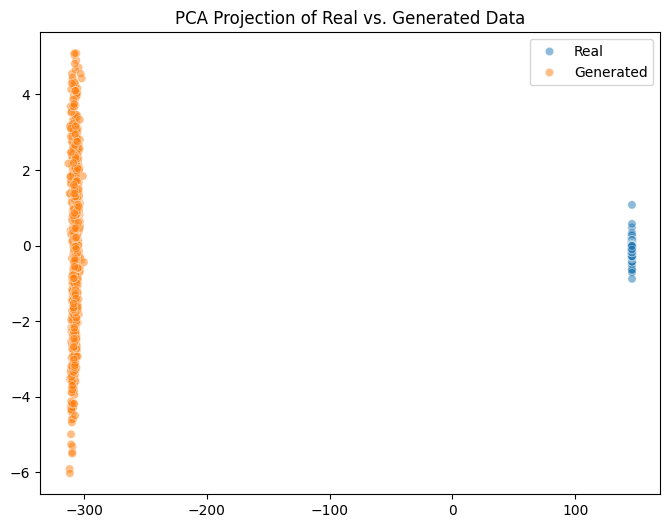

In [27]:
from sklearn.decomposition import PCA
import numpy as np

# Combine real and generated data
combined_data = np.vstack((df_scaled.drop(columns=['label']).values, df_generated.values))
labels = ['Real'] * len(df_scaled) + ['Generated'] * len(df_generated)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Plot PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=labels, alpha=0.5)
plt.title("PCA Projection of Real vs. Generated Data")
plt.show()


In [33]:
# Assign fake labels randomly for generated data
df_generated["label"] = np.random.choice(df_scaled["label"].unique(), len(df_generated))

# Combine real and generated data
df_augmented = pd.concat([df_scaled, df_generated], axis=0)

# Split data for training
X = df_augmented.drop(columns=['label'])  # Make sure this comes from df_augmented
y = df_augmented['label'].astype(int)  # Now correctly aligns with X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debugging prints
print("df_scaled shape:", df_scaled.shape)
print("df_generated shape:", df_generated.shape)
print("df_augmented shape:", df_augmented.shape)
print("X shape:", X.shape, "y shape:", y.shape)
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

# Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")


df_scaled shape: (2103, 5898)
df_generated shape: (1000, 5897)
df_augmented shape: (3103, 5898)
X shape: (3103, 5897) y shape: (3103,)
X_train shape: (2482, 5897) y_train shape: (2482,)
X_test shape: (621, 5897) y_test shape: (621,)
Classification Accuracy: 0.84
